# **Logistic Regression:**

Logistic regression is an example of supervised learning.

It is used to calculate or predict the probality of a binary (yes/no) event occuring.
EX- Logistic regression could be applying machine learning to determine if a person is likely to be infected with covid-19 or Not.

In [1]:
import pandas as pd
dataset = pd.read_csv("heart_1.csv")

In [2]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
print(dataset.shape)

(303, 14)


**Data Exploration**

In [4]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
dataset['target'].value_counts()/dataset['target'].count()

1    0.544554
0    0.455446
Name: target, dtype: float64

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.shape

(303, 14)

In [8]:
dataset.groupby(['target','sex'])['age'].count()

target  sex
0       0       24
        1      114
1       0       72
        1       93
Name: age, dtype: int64

In [9]:
dataset.groupby(['target','sex'])['age'].size()

target  sex
0       0       24
        1      114
1       0       72
        1       93
Name: age, dtype: int64

In [10]:
dataset.groupby(['target'])['age'].count()

target
0    138
1    165
Name: age, dtype: int64

In [11]:
dataset.groupby(['target'])['age'].size()

target
0    138
1    165
Name: age, dtype: int64

In [12]:
dataset.groupby(['sex'])['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

In [13]:
dataset.groupby(['cp','target']).size()

cp  target
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          69
3   0           7
    1          16
dtype: int64

In [16]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#sns.countplot(x='target',data=dataset, palette='his')
#plt.show()

**Split the data into features (X) and target (Y) label sets**

In [21]:
x =pd.DataFrame(dataset.iloc[:,:-1])
y =pd.DataFrame(dataset.iloc[:,-1])

In [22]:
#dataset['target']

In [23]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


**Split the data into a training and test set**

In [25]:
#import module to split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242, 1)
(61, 1)


In [27]:
#y_train.values.ravel()

**Create and Train the Model**

In [28]:
#import module for fitting
from sklearn.linear_model import LogisticRegression

#Create instance (i.e. object) of Logisticregression
logmodel=LogisticRegression()
#training
logmodel.fit(x_train, y_train)
#logmodel.fit(x_train, y_train.values.ravel())

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#logmodel.fit(x_train, y_train.values)

In [30]:
#from sklearn.linear_model import LogisticRegression
#logmodel=LogisticRegression()
#logmodel.fit(x_train, y_train)

In [31]:
#logmodel.fit(x_train, y_train.values)

**Predicting the test set results**

In [29]:
y_pred=logmodel.predict(x_test)
y_pred_prob=logmodel.predict_proba(x_test)

In [30]:
print(y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1]


In [31]:
y_pred_prob

array([[0.99696029, 0.00303971],
       [0.24969326, 0.75030674],
       [0.93514153, 0.06485847],
       [0.993436  , 0.006564  ],
       [0.97229192, 0.02770808],
       [0.99629506, 0.00370494],
       [0.99022714, 0.00977286],
       [0.36624943, 0.63375057],
       [0.99555348, 0.00444652],
       [0.01346919, 0.98653081],
       [0.60844403, 0.39155597],
       [0.90729981, 0.09270019],
       [0.23428151, 0.76571849],
       [0.67991711, 0.32008289],
       [0.77199204, 0.22800796],
       [0.059507  , 0.940493  ],
       [0.01209812, 0.98790188],
       [0.98593551, 0.01406449],
       [0.47883989, 0.52116011],
       [0.1494823 , 0.8505177 ],
       [0.02019389, 0.97980611],
       [0.98224988, 0.01775012],
       [0.23300856, 0.76699144],
       [0.02537371, 0.97462629],
       [0.0180309 , 0.9819691 ],
       [0.26084417, 0.73915583],
       [0.99616435, 0.00383565],
       [0.01517379, 0.98482621],
       [0.12360694, 0.87639306],
       [0.00855969, 0.99144031],
       [0.

**Calculating the Accuracy**

In [32]:
print('Accuracy: %d',(logmodel.score(x_test, y_test)))

Accuracy: %d 0.7704918032786885


**Evalute model using Confusion Matrix**

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[20 10]
 [ 4 27]]


In [36]:
(20+27)/(20+27+10+4)#accuracy

0.7704918032786885

The result is telling us that we have 20+27 correct predictions and 10+4 incorrecrt predictions.

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



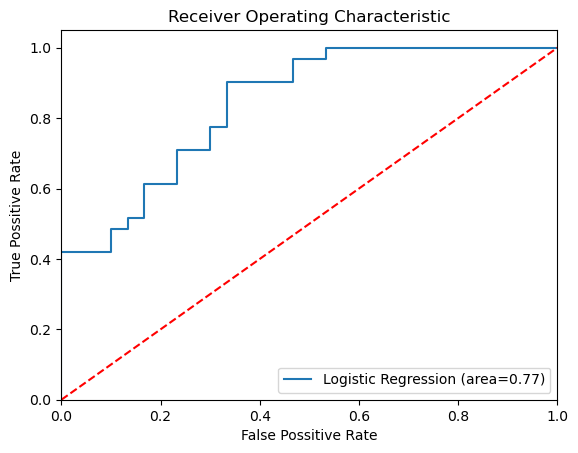

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr , tpr, label='Logistic Regression (area=%0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Possitive Rate')
plt.ylabel('True Possitive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Note: The receiver operating characteristic(ROC) curve is used with binary classifier. The dotted line represents the ROC curve of a purely random classifier, a good       classifier stays as far away from that line as possible (towards the top-left corner.)

Judging from this we can say our classifier model was good enough with a 73% Accuracy. 